# MACHINE LEARNING MODEL PREDICTION FOR BANK MARKETING DATASET USING CLASSIFICATION ALGORITHM

NAME = PRITAM KUMAR DAS 

SID = 2245979

DEPARTMENT = BTECH (COMPUTER SCIENCE (AIML))

SUBMITTED TO = SANGMESH SIR

## IMPORT SOME LIBRARY OF PYTHON 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


## IMPORT THE DATASET

In [4]:
data = pd.read_csv('Book2.csv')

# Bank Marketing Dataset

In [5]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [7]:
print(data.describe())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [8]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


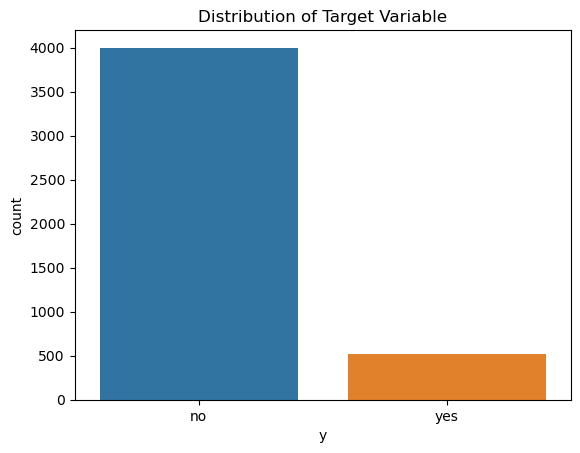

In [9]:
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable')
plt.show()


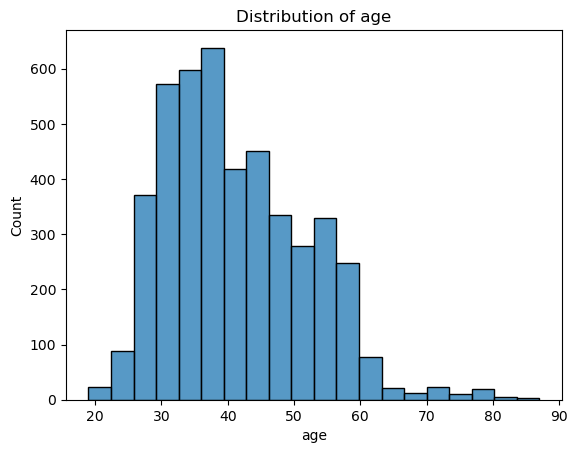

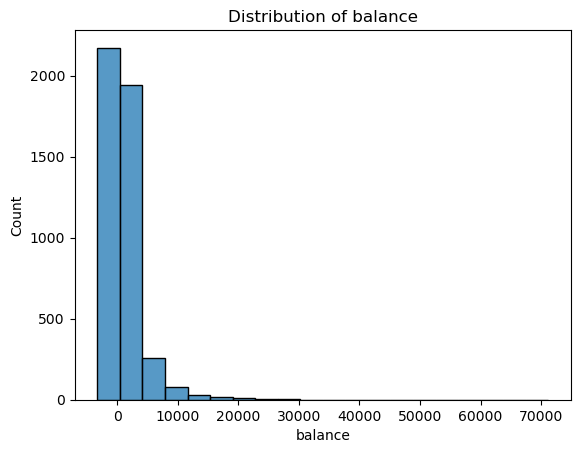

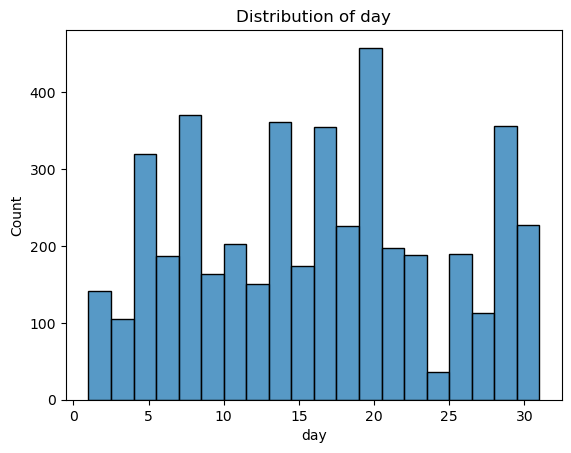

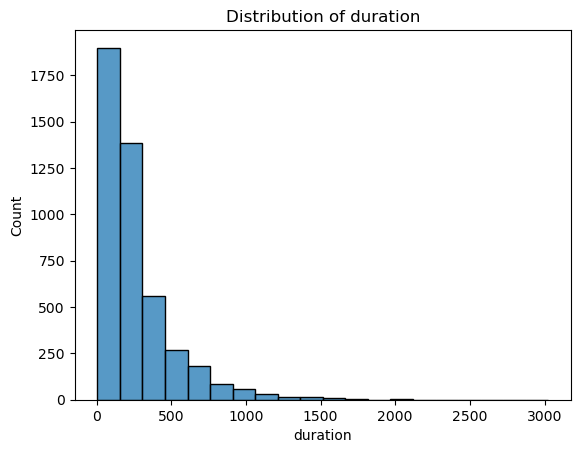

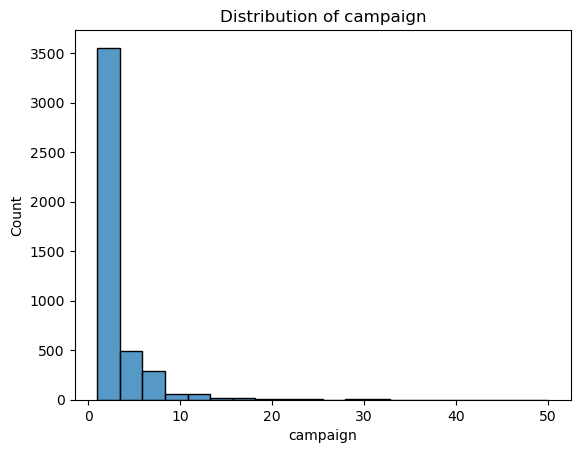

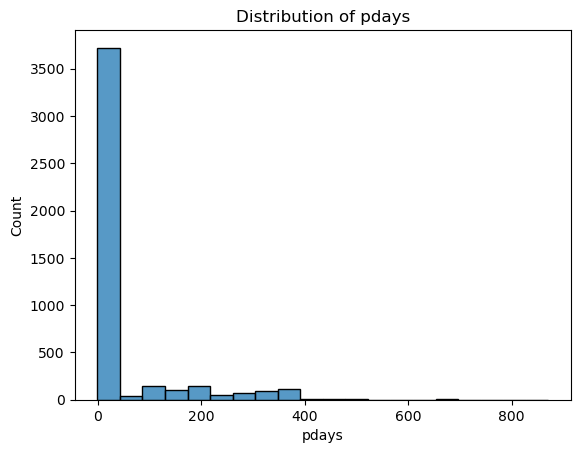

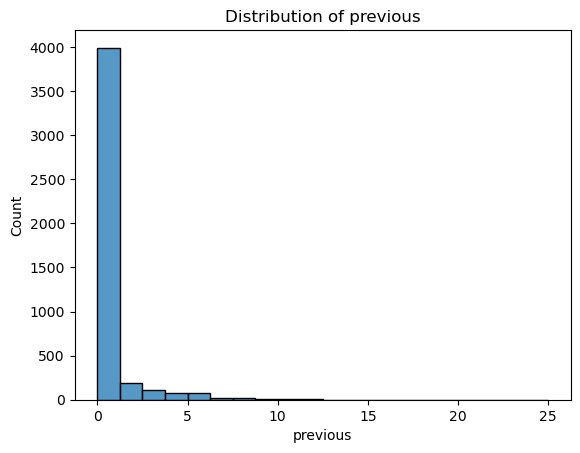

In [10]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    sns.histplot(data[feature], bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

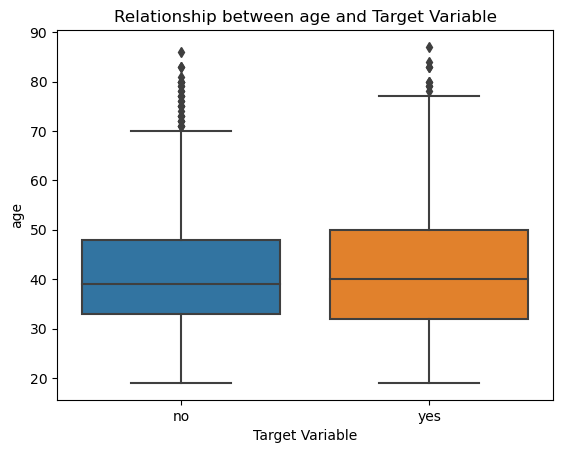

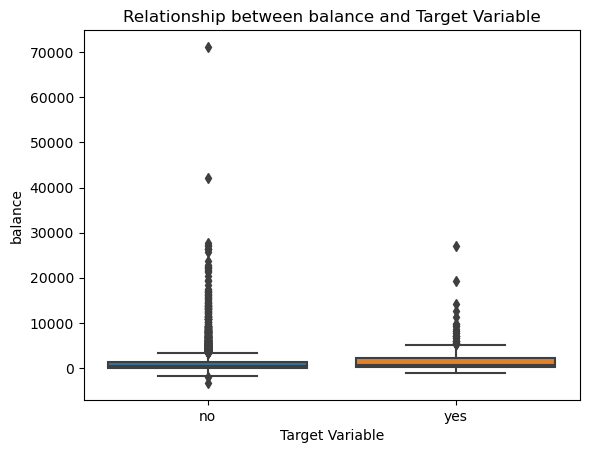

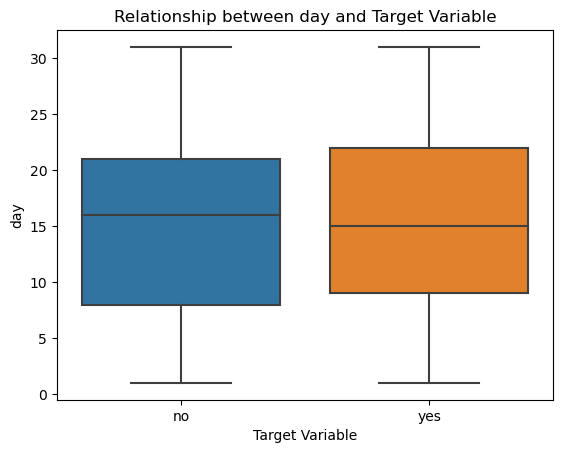

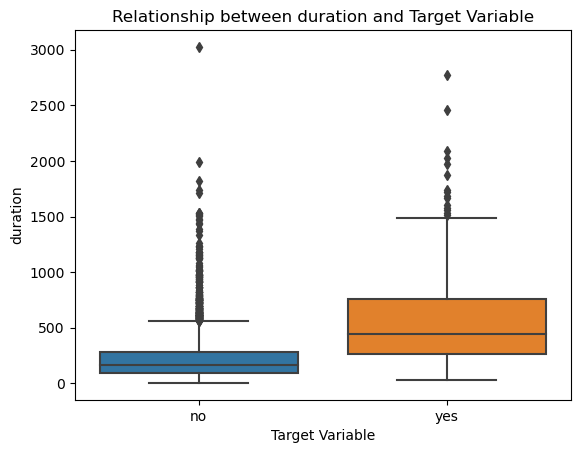

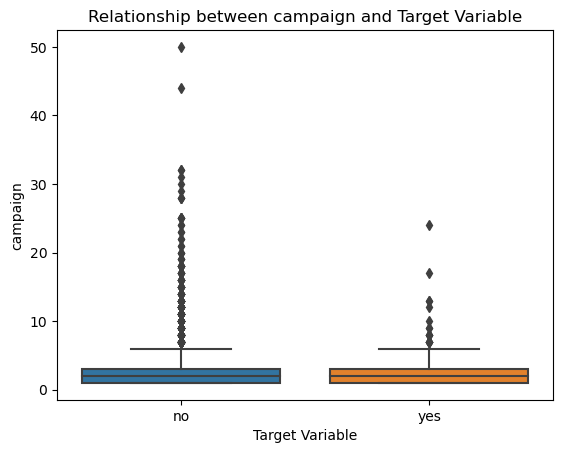

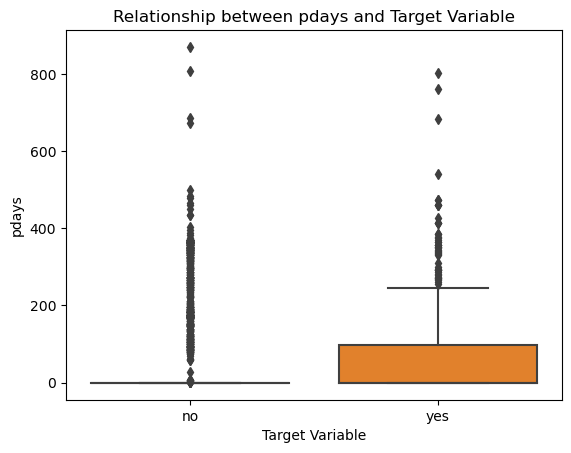

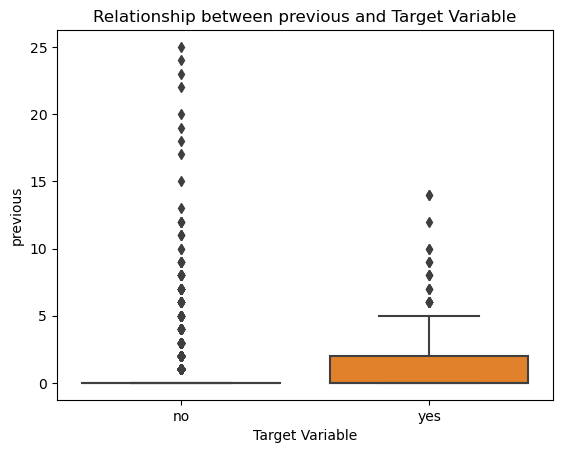

In [11]:
for feature in numerical_features:
    sns.boxplot(x='y', y=feature, data=data)
    plt.title(f'Relationship between {feature} and Target Variable')
    plt.xlabel('Target Variable')
    plt.ylabel(feature)
    plt.show()

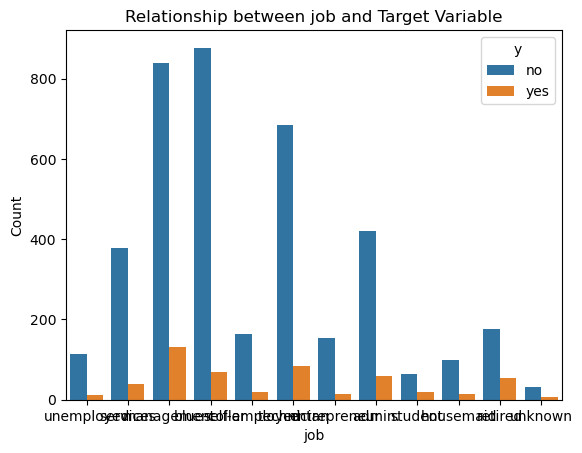

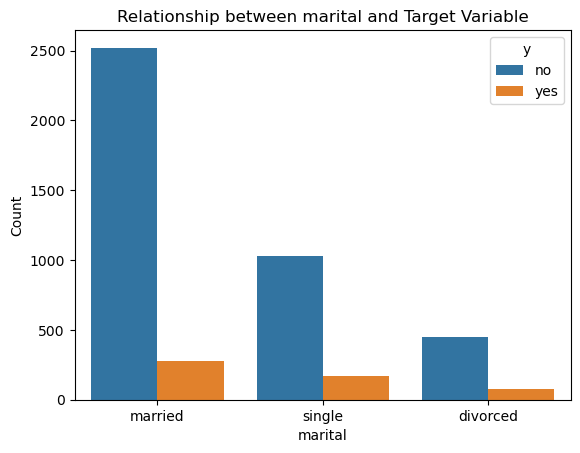

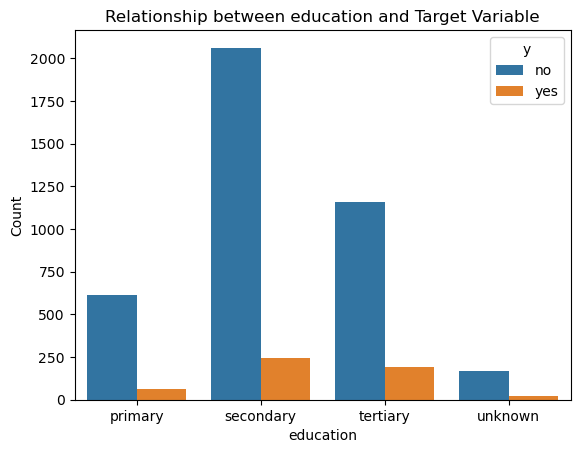

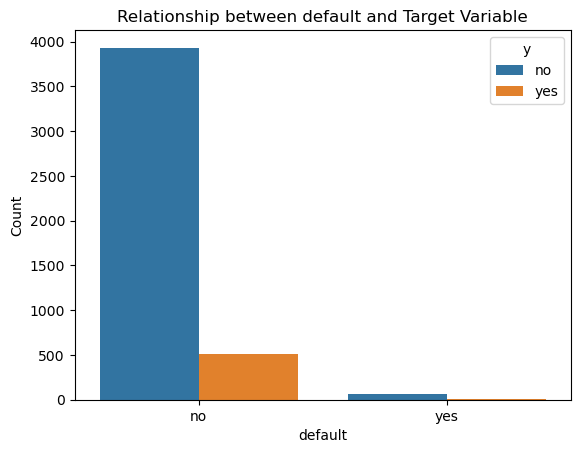

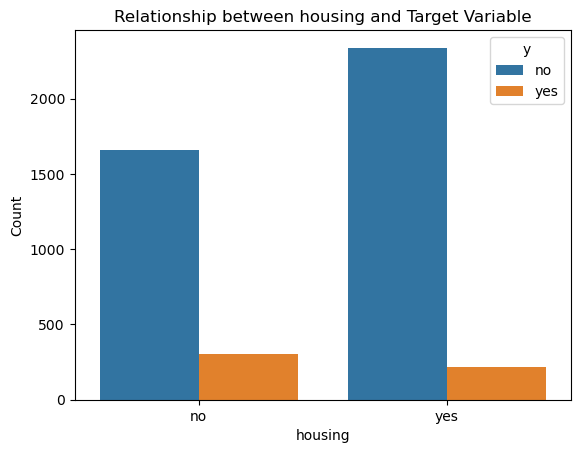

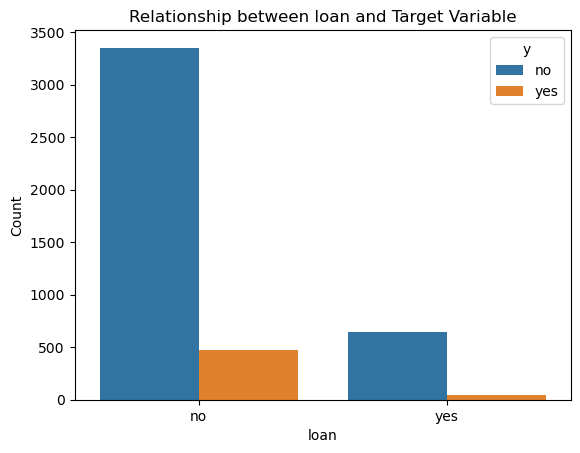

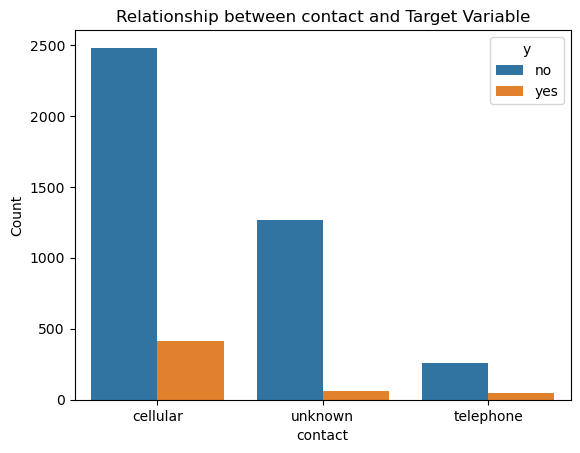

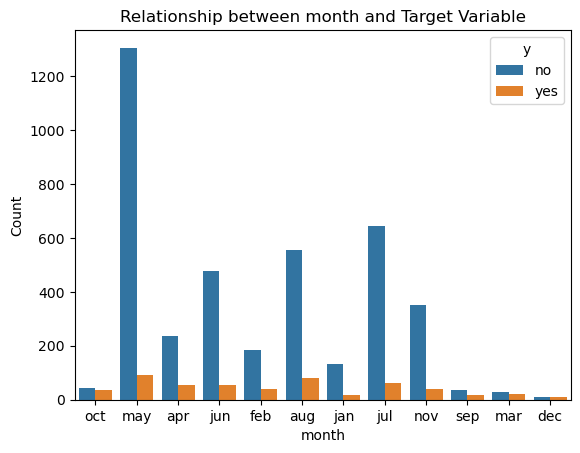

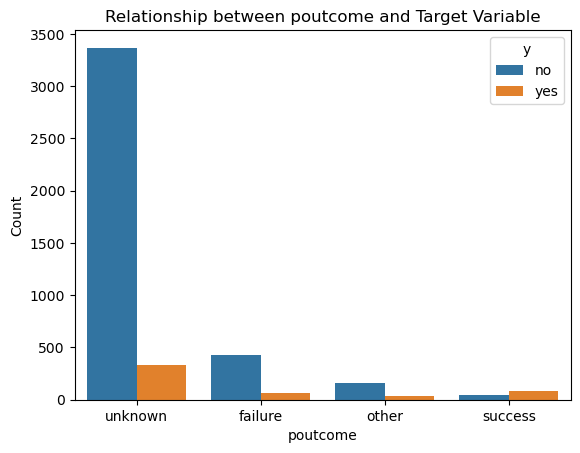

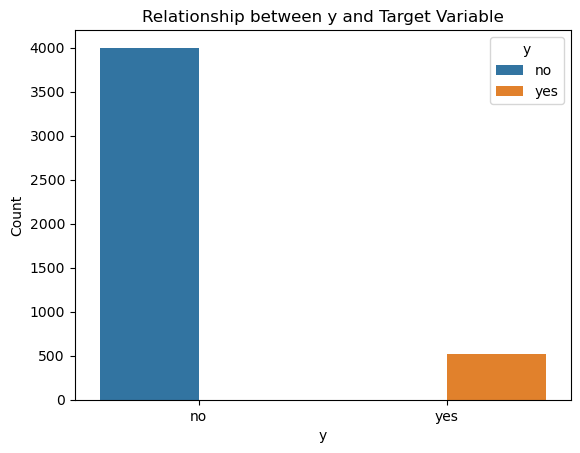

In [12]:
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    sns.countplot(x=feature, hue='y', data=data)
    plt.title(f'Relationship between {feature} and Target Variable')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

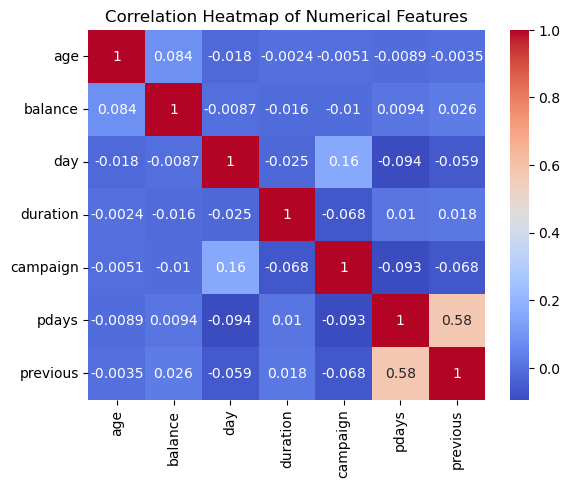

In [13]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Separate features (X) and target variable (y)

In [14]:
X = data.drop(columns=['y'])
y = data['y']

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# LOGISTIC REGRESSION

In [15]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)
accuracy_percentage = accuracy * 100
print("Accuracy of Logistic Regression Model:", accuracy_percentage, "%")

Accuracy of Logistic Regression Model: 89.39226519337016 %


#### PREDICTION OF LOGISTIC REGRESSION

In [16]:
logistic_pred = logistic_model.predict(X_test_scaled)
results = pd.DataFrame({'Actual': y_test, 
                        'Logistic Regression Predicted': logistic_pred,})


In [17]:
print(results.head())

     Actual Logistic Regression Predicted
2398     no                            no
800      no                            no
2288     no                            no
2344     no                            no
3615     no                            no


In [18]:
print(results.tail())

     Actual Logistic Regression Predicted
3589    yes                            no
3128     no                            no
3259     no                            no
4239     no                            no
2233    yes                            no


# RANDOM FOREST CLASSIFIER

In [19]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_percentage = accuracy_rf * 100
print("Accuracy of Logistic Regression Model:", accuracy_percentage, "%")

Accuracy of Logistic Regression Model: 90.27624309392264 %


#### PREDICTION FOR RANDOM FOREST CLASSIFIER

In [20]:
rf_pred = rf_classifier.predict(X_test_scaled)
results = pd.DataFrame({'Actual': y_test, 
                        'Random Forest Predicted': rf_pred})

In [21]:
print(results.head())

     Actual Random Forest Predicted
2398     no                      no
800      no                     yes
2288     no                      no
2344     no                      no
3615     no                      no


In [22]:
print(results.tail())

     Actual Random Forest Predicted
3589    yes                     yes
3128     no                      no
3259     no                      no
4239     no                      no
2233    yes                      no


# SUPPORT VECTOR CLASSIFIER

In [23]:
# Initialize and train the Support Vector classifier (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_percentage = accuracy_svm * 100
print("Accuracy of Logistic Regression Model:", accuracy_percentage, "%")

Accuracy of Logistic Regression Model: 89.50276243093923 %


#### PREDICTION FOR SUPPORT VECTOR CLASSIFIER

In [24]:
svm_pred = svm_classifier.predict(X_test_scaled)
results = pd.DataFrame({'Actual': y_test,
                        'SVM Predicted': svm_pred})


In [25]:
print(results.head())

     Actual SVM Predicted
2398     no            no
800      no           yes
2288     no            no
2344     no            no
3615     no            no


In [26]:
print(results.tail())

     Actual SVM Predicted
3589    yes            no
3128     no            no
3259     no            no
4239     no            no
2233    yes            no
